1. Biểu diễn lại bài toán, tính lại đạo hàm loss function với từng biến w.


Từ điểm các điểm dữ liệu $(x_1^{(i)}, x_2^{(i)})$ ứng với các giá trị $y^{(i)}$, ta mong muốn vẽ được 1 mặt phẳng trong không gian 3 chiều phân cách các điểm dữ liệu thành 2 phần.

Tìm $z = w_0 + w_1*x_1 + w_2*x_2$ 
Tuy nhiên với hàm $z$ như trên, giá trị $\hat{y} = z$ sẽ chạy từ trừ vô cùng đến vô cùng.

Từ đó chọn 1 hàm cho $\hat{y}$ đi qua để giá trị thu được nằm trong khoảng $(0, 1)$.

Chọn $\hat{y} = \sigma{(z)=} 1/(1 + e^{-z})$. 

Từ đó, giá trị $\hat{y}$ thể hiện xác suất cho vay.

Định nghĩa Loss Function:
$L = -[y*log(\hat{y}) + (1-y)*log(1-\hat{y})]$

Minimize loss function: dùng chain rule:
$\dfrac {\partial L} {\partial w_1} = \dfrac {\partial L} {\partial \hat{y}}.\dfrac {\partial \hat{y}} {\partial z}.\dfrac {\partial z} {\partial w_1}$

Trong đó:
$\dfrac {\partial L} {\partial \hat{y}} = (\hat{y} - y)/(\hat{y}*(1-\hat{y}))$

$\dfrac {\partial \hat{y}} {\partial z} = \hat{y}*(1 - \hat{y})$

$\dfrac {\partial z} {\partial w_1} = x_1$

Tương tự với đạo hàm của L với các $w_0$ và $w_2$:

$\dfrac {\partial z} {\partial w_0} = 1; \dfrac {\partial z} {\partial w_2} = x_2$

Suy ra đạo hàm của Loss function với các w là:

$$\begin{cases}
\dfrac {\partial L} {\partial w_0} = (\hat{y} - y)\\
\dfrac {\partial L} {\partial w_1} = (\hat{y} - y)*x_1\\
\dfrac {\partial L} {\partial w_2} = (\hat{y} - y)*x_2
\end{cases}$$


3. Thử chỉnh learning_rate với code mẫu, vẽ loss function theo epoch để xem độ tăng giảm của loss function.

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
# Load data từ file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Logistic Regression/dataset.csv').values
N, dim = data.shape
x = data[:, 0:dim-1].reshape(-1, dim-1)
y = data[:, dim-1].reshape(-1, 1)
print(N, dim)

20 3


In [79]:
# Define ham Sigmoid:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [80]:
# Vẽ data bằng Scatter
x_chovay = x[y[:, 0]==1]
x_tuchoi = x[y[:, 0]==0]

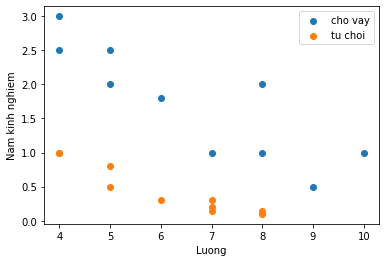

In [81]:
plt.scatter(x_chovay[:, 0], x_chovay[:, 1], label ='cho vay')
plt.scatter(x_tuchoi[:, 0], x_tuchoi[:, 1], label ='tu choi')
plt.legend()
plt.xlabel('Luong')
plt.ylabel('Nam kinh nghiem')
plt.show()

In [ ]:
# thêm 1 cột 1 vào dữ liệu x
b = np.ones((N, 1))
print(b)
print(x)
x = np.hstack((b, x))
print(x)

Text(0, 0.5, 'Loss')

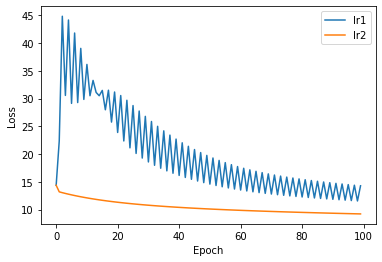

In [83]:
import copy
w1 = np.array([0., 0.1, 0.1]).reshape(-1, 1)
w2 = w1.copy()
# chạy theo số epoch
epoch = 100
cost1 = np.zeros((epoch, 1))
cost2 = cost1.copy()
lr1 = 0.02
lr2 = 0.005

for i in range(epoch):
    # tính giá trị dự đoán
    y_hat = sigmoid(np.dot(x, w1))
    cost1[i] = -np.sum(y*(np.log(y_hat)) + (1-y)*(np.log(1-y_hat)) )
    # gradient descent
    w1 = w1 - lr1 * np.dot(x.T, (y_hat - y))
    # với lr2
    y_hat = sigmoid(np.dot(x, w2))
    cost2[i] = -np.sum(y*(np.log(y_hat)) + (1-y)*(np.log(1-y_hat)) )
    w2 = w2 - lr2 * np.dot(x.T, (y_hat - y))
plt.plot(cost1, label='lr1')
plt.plot(cost2, label='lr2')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [84]:
print(w2)

[[-0.49772299]
 [-0.08687666]
 [ 1.30818209]]


4. Thử giải bài toán XOR bằng logistic regression (chạy code thật) Giải thích tại sao lại không tìm được? Trong model đổi hàm linear trong sigmoid bằng hàm non-linear để giải bài toán XOR (parabol, ellipse, (x-a)/(x-b)

In [86]:
# prepare dữ liệu
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
Y = np.array([0, 1, 1, 0]).reshape(-1, 1)

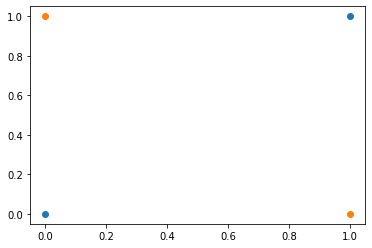

In [87]:
X_zero = X[Y[:, 0]==0]
X_one = X[Y[:, 0]==1]
plt.scatter(X_zero[:, 0], X_zero[:, 1])
plt.scatter(X_one[:, 0], X_one[:, 1])

In [88]:
# thêm cột 1 vào X
b1 = np.ones((4, 1))
X = np.hstack((b1, X))
print(X)

[[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]


[[0.50807164]
 [0.52227393]
 [0.52227393]
 [0.5364403 ]]
[[0.03139878]
 [0.05627822]
 [0.05627822]]


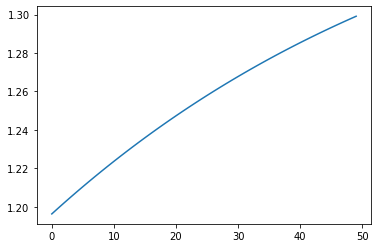

In [93]:
W = np.array([0.1, 0.1, 0.1]).reshape(-1, 1)
# chạy theo số epoch
Epoch = 50
lrate = 0.01

loss = np.zeros(Epoch).reshape(-1, 1)
for i in range(Epoch):
    # tinh gia tri du doan:
     Y_hat = sigmoid(np.dot(X, W))
     # cap nhat W theo learning rate:
     W = W - lrate*(np.dot(X.T, (Y_hat - Y)))
    #  print(Y_hat)
     # tinh loss:
     loss[i] = -np.sum(Y*(np.log(Y_hat) + (1-Y)*(np.log(1-Y_hat)) ) )
     
# print(loss)
print(Y_hat)
print(W)
plt.plot(loss)

5. Học, hiểu và replicate lại tutorial này (logistic regression dùng thư viện cũng như các bước để xử lý dữ liệu)

In [54]:
# data
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Logistic Regression/diabetes.csv')
df.columns = col_names

print(df.head())

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1


In [58]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols] # Features
Y = df.label # Target variable
print(X)
print(Y)

     pregnant  insulin   bmi  age  glucose  bp  pedigree
0           6        0  33.6   50      148  72     0.627
1           1        0  26.6   31       85  66     0.351
2           8        0  23.3   32      183  64     0.672
3           1       94  28.1   21       89  66     0.167
4           0      168  43.1   33      137  40     2.288
..        ...      ...   ...  ...      ...  ..       ...
763        10      180  32.9   63      101  76     0.171
764         2        0  36.8   27      122  70     0.340
765         5      112  26.2   30      121  72     0.245
766         1        0  30.1   47      126  60     0.349
767         1        0  30.4   23       93  70     0.315

[768 rows x 7 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.25, random_state=0)
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predict = logreg.predict(X_test)


In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cnf_matrix = confusion_matrix(y_test, y_predict)
cnf_matrix

array([[117,  13],
       [ 24,  38]])

In [68]:
print("Accuracy:", accuracy_score(y_test, y_predict))

Accuracy: 0.8072916666666666


In [71]:
print('Precision:', precision_score(y_test, y_predict))

Precision: 0.7450980392156863


In [75]:
print('Recall:', recall_score(y_test, y_predict))

Recall: 0.6129032258064516
